## Transfer Learning VGG 16 using Keras

In [1]:
!nvidia-smi

Wed Aug 16 01:34:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ROOT_PATH = '/content/drive/MyDrive/Vegetable-Classification-AWS-main'

In [6]:
!pwd

/content


In [7]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/Vegetable-Classification-AWS-main'

In [8]:
!ls

app.py		  LICENSE     requirements.txt	Vegetable_Images
Cat_Dog.egg-info  model       setup.py		Vegetables_by_VGG16.ipynb
com_in_ai_utils   prediction  static
Dockerfile	  README.md   templates


In [9]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Vegetable_Images/train'
test_path = 'Vegetable_Images/test'
validation_path = 'Vegetable_Images/validation'


In [10]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 4s 0us/step


In [11]:
# don't train existing weights
for layer in vgg16.layers:
  print(layer)

In [12]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [13]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [14]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
 # useful for getting number of output classes
 folders = glob('Vegetable_Images/train/*')

In [16]:
folders

['Vegetable_Images/train/Bean',
 'Vegetable_Images/train/Bitter_Gourd',
 'Vegetable_Images/train/Brinjal',
 'Vegetable_Images/train/Bottle_Gourd',
 'Vegetable_Images/train/Broccoli',
 'Vegetable_Images/train/Cabbage',
 'Vegetable_Images/train/Capsicum',
 'Vegetable_Images/train/Carrot',
 'Vegetable_Images/train/Cauliflower',
 'Vegetable_Images/train/Cucumber',
 'Vegetable_Images/train/Papaya',
 'Vegetable_Images/train/Tomato',
 'Vegetable_Images/train/Potato',
 'Vegetable_Images/train/Radish',
 'Vegetable_Images/train/Pumpkin']

In [17]:
len(folders)

15

In [18]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(15,activation='softmax'))

In [19]:
# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 15)                3855      
                                                                 
Total params: 21,141,327
Trainable params: 6,426,639
Non-trainable params: 14,714,688
_________________________________________________________________


In [20]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [21]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
!pwd

/content/drive/MyDrive/Vegetable-Classification-AWS-main


In [23]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14750 images belonging to 15 classes.


In [24]:
validation_set = test_datagen.flow_from_directory(validation_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


In [25]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

Epoch 1/10
11/11 [==============================] - 140s 11s/step - loss: 2.5550 - accuracy: 0.5045 - val_loss: 0.5679 - val_accuracy: 0.7288
Epoch 2/10
11/11 [==============================] - 5s 459ms/step - loss: 0.3792 - accuracy: 0.8487 - val_loss: 0.4688 - val_accuracy: 0.8475
Epoch 3/10
11/11 [==============================] - 6s 541ms/step - loss: 0.1932 - accuracy: 0.9199 - val_loss: 0.4790 - val_accuracy: 0.8305
Epoch 4/10
11/11 [==============================] - 6s 542ms/step - loss: 0.1336 - accuracy: 0.9377 - val_loss: 0.4948 - val_accuracy: 0.8305
Epoch 5/10
11/11 [==============================] - 6s 568ms/step - loss: 0.1142 - accuracy: 0.9614 - val_loss: 0.5512 - val_accuracy: 0.8305
Epoch 6/10
11/11 [==============================] - 5s 468ms/step - loss: 0.0810 - accuracy: 0.9763 - val_loss: 0.4560 - val_accuracy: 0.7966
Epoch 7/10
11/11 [==============================] - 5s 476ms/step - loss: 0.0544 - accuracy: 0.9881 - val_loss: 0.4905 - val_accuracy: 0.8136
Epoch 

In [ ]:
import matplotlib.pyplot as plt

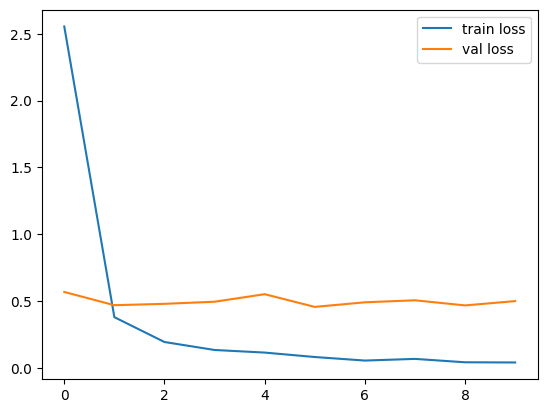

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

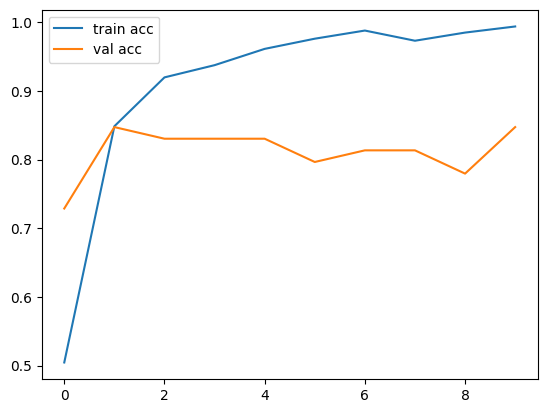

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
y_pred = model.predict(test_set)

2/2 [==============================] - 0s 156ms/step


In [ ]:
y_pred

array([[7.51936853e-01, 2.48063147e-01],
       [9.05485690e-01, 9.45142508e-02],
       [9.99718845e-01, 2.81134475e-04],
       [9.99669552e-01, 3.30465118e-04],
       [4.39556334e-06, 9.99995589e-01],
       [3.42216641e-01, 6.57783329e-01],
       [9.99894023e-01, 1.06007516e-04],
       [9.52885032e-01, 4.71150056e-02],
       [7.34670088e-02, 9.26532984e-01],
       [8.19401979e-01, 1.80598080e-01],
       [6.20819807e-01, 3.79180133e-01],
       [2.59611994e-01, 7.40388036e-01],
       [9.48353946e-01, 5.16460724e-02],
       [1.97195075e-03, 9.98027980e-01],
       [7.88158854e-04, 9.99211788e-01],
       [3.68533358e-02, 9.63146687e-01],
       [8.48176642e-05, 9.99915123e-01],
       [2.08677109e-02, 9.79132295e-01],
       [1.51315253e-04, 9.99848604e-01],
       [9.86392438e-01, 1.36075029e-02],
       [3.15635447e-07, 9.99999642e-01],
       [2.95430366e-02, 9.70457017e-01],
       [5.78900892e-03, 9.94211078e-01],
       [9.97733116e-01, 2.26688199e-03],
       [9.289402

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg16.h5')

In [ ]:
img=image.load_img('cat.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 36.,  41.,  37.],
        [ 38.,  42.,  41.],
        [ 38.,  42.,  43.],
        ...,
        [200., 200., 166.],
        [200., 198., 160.],
        [203., 201., 162.]],

       [[ 38.,  43.,  39.],
        [ 39.,  43.,  42.],
        [ 40.,  44.,  45.],
        ...,
        [208., 205., 172.],
        [205., 203., 165.],
        [204., 202., 163.]],

       [[ 42.,  47.,  43.],
        [ 40.,  44.,  43.],
        [ 40.,  44.,  45.],
        ...,
        [201., 198., 167.],
        [201., 196., 164.],
        [197., 193., 158.]],

       ...,

       [[ 30.,  28.,  29.],
        [ 24.,  22.,  23.],
        [ 21.,  19.,  20.],
        ...,
        [ 47.,  34.,  28.],
        [ 40.,  27.,  21.],
        [ 52.,  41.,  35.]],

       [[ 34.,  32.,  33.],
        [ 27.,  25.,  26.],
        [ 24.,  22.,  23.],
        ...,
        [ 45.,  32.,  24.],
        [ 44.,  31.,  23.],
        [ 65.,  55.,  46.]],

       [[ 30.,  28.,  29.],
        [ 26.,  24.,  25.],
        [ 24.,  

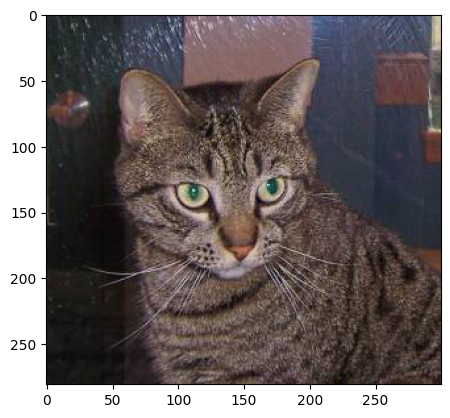

In [ ]:
Z = plt.imread('cat.jpg')
plt.imshow(Z)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 1s 695ms/step


array([[0.9988186 , 0.00118137]], dtype=float32)

In [ ]:
result = np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 22ms/step


In [ ]:
result[0]

0

In [ ]:
if result[0] == 0:
    prediction = 'Bean'
    print(prediction)
elif result[0] == 1:
    prediction = 'Bitter_Gourd'
    print(prediction)
elif result[0] == 2:
    prediction = 'Bottle_Gourd'
    print(prediction)
elif result[0] == 3:
    prediction = 'Brinjal'
    print(prediction)
elif result[0] == 4:
    prediction = 'Broccoli'
    print(prediction)
elif result[0] == 5:
    prediction = 'Cabbage'
    print(prediction)
elif result[0] == 6:
    prediction = 'Capsicum'
    print(prediction)
elif result[0] == 7:
    prediction = 'Carrot'
    print(prediction)
elif result[0] == 8:
    prediction = 'Cauliflower'
    print(prediction)
elif result[0] == 9:
    prediction = 'Cucumber'
    print(prediction)
elif result[0] == 10:
    prediction = 'Papaya'
    print(prediction)
elif result[0] == 11:
    prediction = 'Potato'
    print(prediction)
elif result[0] == 12:
    prediction = 'Pumpkin'
    print(prediction)
elif result[0] == 13:
    prediction = 'Radish'
    print(prediction)
else:
    prediction = 'Tpmato'
    print(prediction)


cat
